In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/FinalCleanFile.csv')
df

,date_time,v_red,current,power_factor,kwh,v_blue,v_yellow,consumer_device_9,consumer_device_x,Temperature (°C),Dewpoint Temperature (°C),U Wind Component (m/s),V Wind Component (m/s),Total Precipitation (mm),Snowfall (mm),Snow Cover (%)
0,2024-07-22 19:00:00,125.629543,1.256716,0.257529,0.009407,106.511045,107.392295,0.022277,21.527228,11.742883,9.245966,0.209122,-0.491055,0.006502,0.00000,0.000000
1,2024-07-22 20:00:00,131.438261,1.570021,0.293663,0.011940,108.350976,109.446880,0.022277,21.527228,11.413995,9.097879,0.145172,-0.539001,0.006545,0.00000,0.000000
2,2024-07-22 21:00:00,133.606395,1.623356,0.337952,0.013546,114.896351,116.076771,0.022277,21.527228,10.794870,8.901697,0.192856,-0.485039,0.006595,0.00000,0.000000
3,2024-07-22 22:00:00,130.571961,1.573983,0.295072,0.012767,112.902697,113.931385,0.022277,21.527228,10.399469,8.749979,0.157013,-0.303240,0.006626,0.00000,0.000000
4,2024-07-22 23:00:00,134.383937,1.929517,0.367702,0.015238,116.606275,118.257191,0.022277,21.527228,10.401529,8.646371,0.177490,-0.574604,0.006639,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,2024-09-14 01:00:00,153.166360,1.311676,0.428511,0.013831,123.235015,127.066644,0.025281,20.637640,6.418542,3.930261,-0.238800,-0.254710,0.000076,0.00000,0.000000
1279,2024-09-14 02:00:00,154.429679,1.390145,0.442519,0.014450,124.869917,128.664296,0.025281,20.637640,6.850275,4.471368,-0.358810,-0.158602,0.000180,0.00000,0.000000
1280,2024-09-14 03:00:00,153.347107,1.335543,0.434412,0.013929,123.849137,127.600490,0.025281,20.637640,7.650003,4.275613,-0.455002,0.319778,0.000771,0.00001,0.000000
1281,2024-09-14 04:00:00,154.433743,1.359368,0.442128,0.014209,125.007733,128.811525,0.025281,20.637640,8.839426,5.121332,-0.315643,0.565828,0.001038,0.00001,0.103516


FEATURE ENGINEERING

In [5]:
# 1. Convert 'date_time' to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

In [6]:
# 2. Extract datetime features
df['hour'] = df['date_time'].dt.hour
df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['day_of_week'] = df['date_time'].dt.dayofweek  # 0 = Monday, 6 = Sunday

In [13]:
# 3. Define seasons manually based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    else:
        return ' Post-monsoon'

df['season'] = df['month'].apply(get_season)

In [14]:
#  preview new columns
df[['date_time', 'hour', 'day',
'month', 'day_of_week', 'season']].tail(100)


,date_time,hour,day,month,day_of_week,season
1183,2024-09-10 02:00:00,2,10,9,1,Post-monsoon
1184,2024-09-10 03:00:00,3,10,9,1,Post-monsoon
1185,2024-09-10 04:00:00,4,10,9,1,Post-monsoon
1186,2024-09-10 05:00:00,5,10,9,1,Post-monsoon
1187,2024-09-10 06:00:00,6,10,9,1,Post-monsoon
...,...,...,...,...,...,...
1278,2024-09-14 01:00:00,1,14,9,5,Post-monsoon
1279,2024-09-14 02:00:00,2,14,9,5,Post-monsoon
1280,2024-09-14 03:00:00,3,14,9,5,Post-monsoon
1281,2024-09-14 04:00:00,4,14,9,5,Post-monsoon


<Axes: title={'center': 'Average kWh by Hour'}, xlabel='hour'>

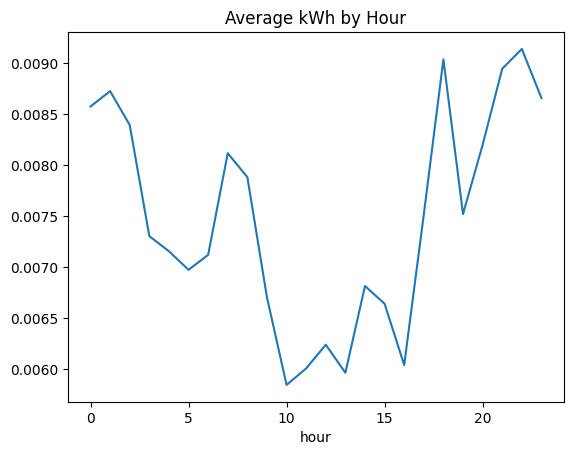

In [15]:
# Hourly Analysis
df.groupby('hour')['kwh'].mean().plot(kind='line', title='Average kWh by Hour')


**Interpretation:**

Energy production fluctuates throughout the day.

There's higher production at night and late evening (0–2 AM, 18–22 PM).

Lowest production occurs between 10 AM to 3 PM, which is atypical for solar but logical for micro-hydro based on usage patterns.

**Explanation**

Micro-hydro generation is often demand-driven in off-grid communities:

Evening spikes correspond to high household energy use (lighting, heating, cooking).

Daytime drops may be due to reduced demand, manual control, or water storage for peak-time generation

<Axes: title={'center': 'Average kWh by Day of Week'}, xlabel='day_of_week'>

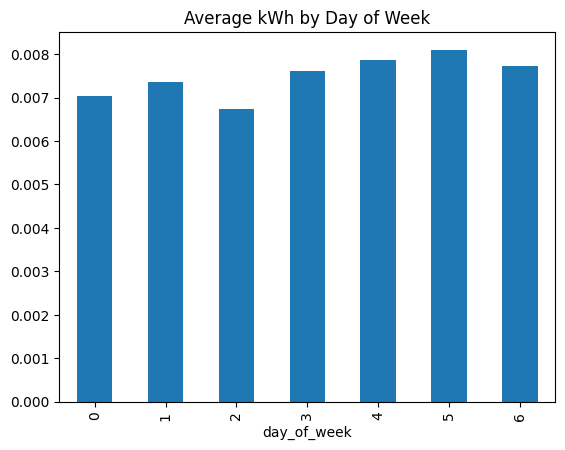

In [16]:
# Day of the week Analysis
df.groupby('day_of_week')['kwh'].mean().plot(kind='bar', title='Average kWh by Day of Week')


**Interpretation:**

Highest production: Friday (5), slightly above 0.008 kWh

Lowest production: Wednesday (2), around 0.0068 kWh

General pattern: Energy production is fairly stable throughout the week with minor variation

From Monday to Thursday, there’s a gradual increase

Friday is the peak, possibly due to higher community usage or water availability

A slight dip on the weekend (Saturday–Sunday) but still higher than mid-week

**Explanation**

Micro-hydropower energy production is slightly variable across the week, peaking on Friday and dipping on Wednesday.

These patterns likely reflect local community routines and operational choices rather than natural constraints.

In [17]:
#  Seasonal Analysis
# Group by season and calculate average kWh
seasonal_avg_kwh = df.groupby('season')['kwh'].mean().sort_values(ascending=False)

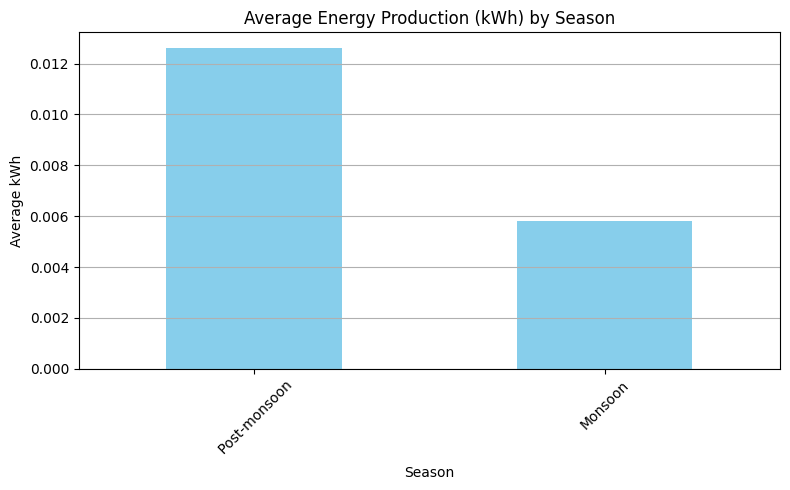

In [18]:
#  Seasonal Analysis
 # Plot
plt.figure(figsize=(8, 5))
seasonal_avg_kwh.plot(kind='bar', color='skyblue')
plt.title('Average Energy Production (kWh) by Season')
plt.xlabel('Season')
plt.ylabel('Average kWh')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Seasonal Analysis Interpretation:  **   
Post-Monsoon season shows significantly higher average energy production (~0.0125 kWh) compared to the Monsoon season (~0.0058 kWh).

This suggests that micro-hydropower plants in the Kalam region are more effective after the monsoon.

**Explanation**

During the monsoon, although rainfall is high, heavy debris, flooding, or sediment might disrupt turbines or require shutdowns.

In the post-monsoon, stable water flow with cleaner conditions likely leads to more reliable and efficient power generation.

## **[Univariate Analysis]**

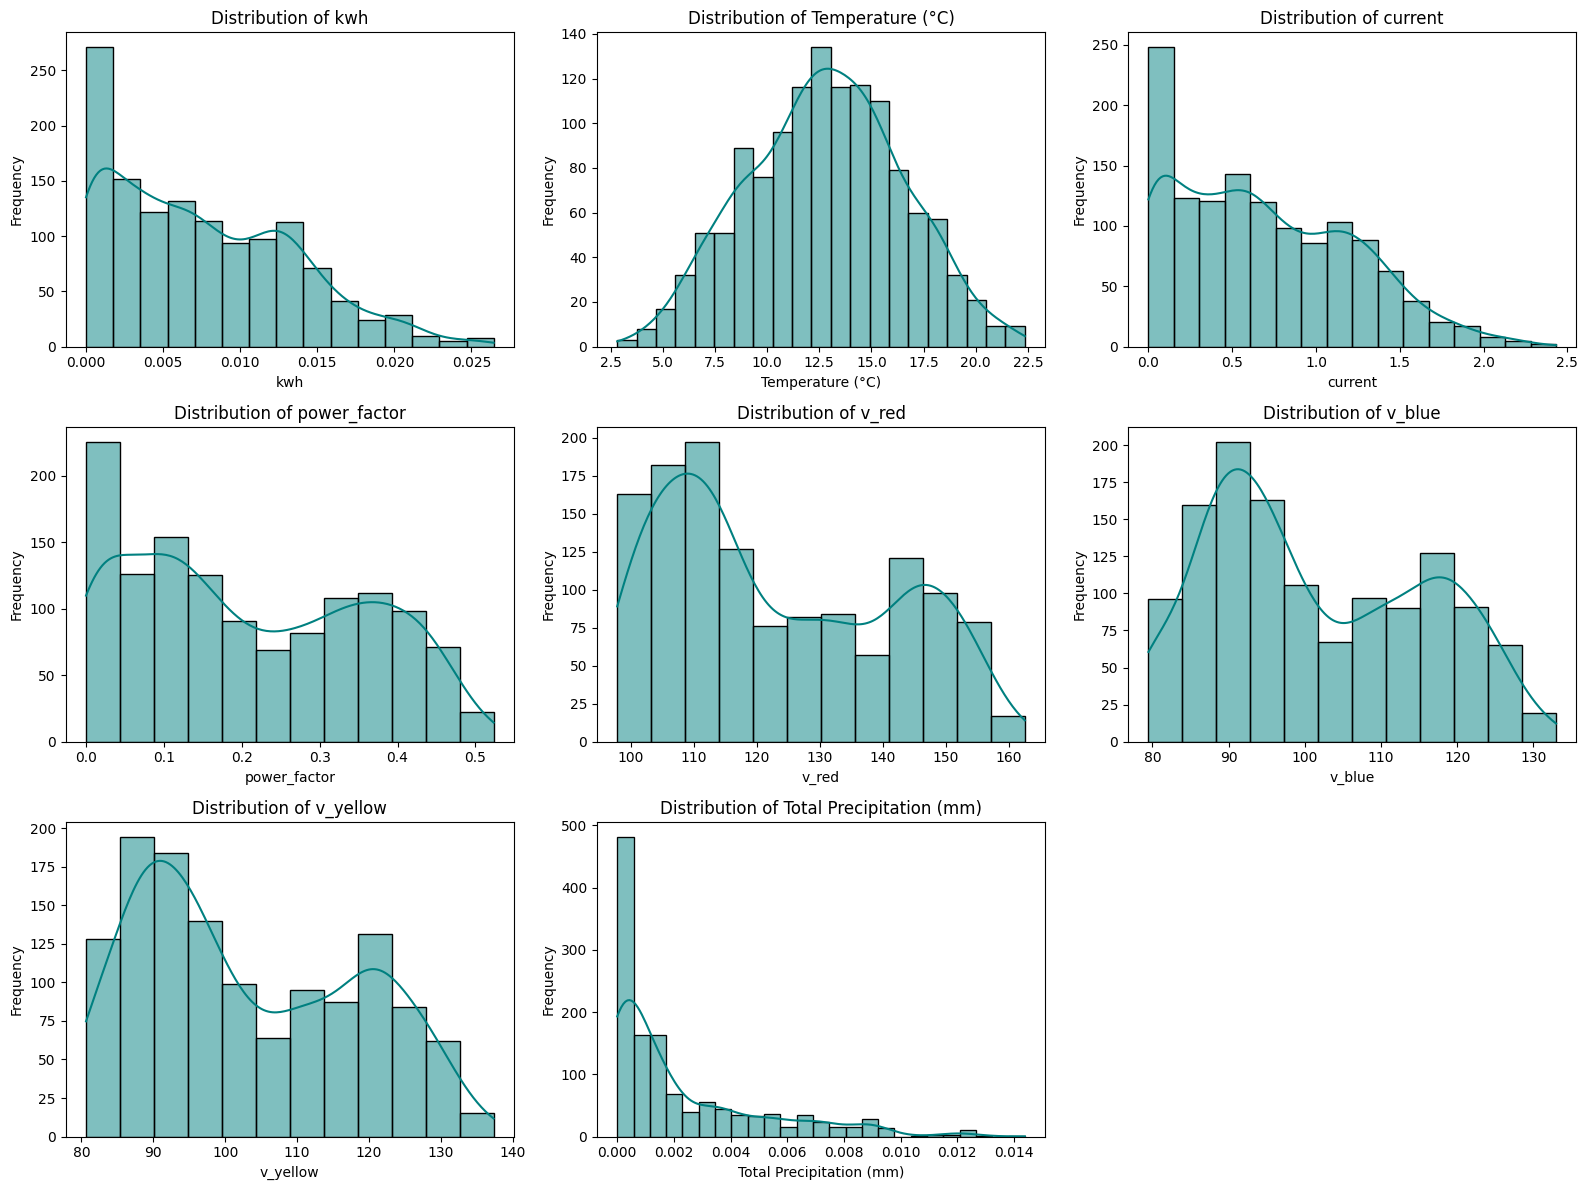

In [19]:
# Select key numerical columns for univariate analysis
cols_to_plot = ['kwh', 'Temperature (°C)', 'current', 'power_factor', 'v_red', 'v_blue', 'v_yellow', 'Total Precipitation (mm)']

# Set up the figure
plt.figure(figsize=(16, 12))

# Loop through and plot
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

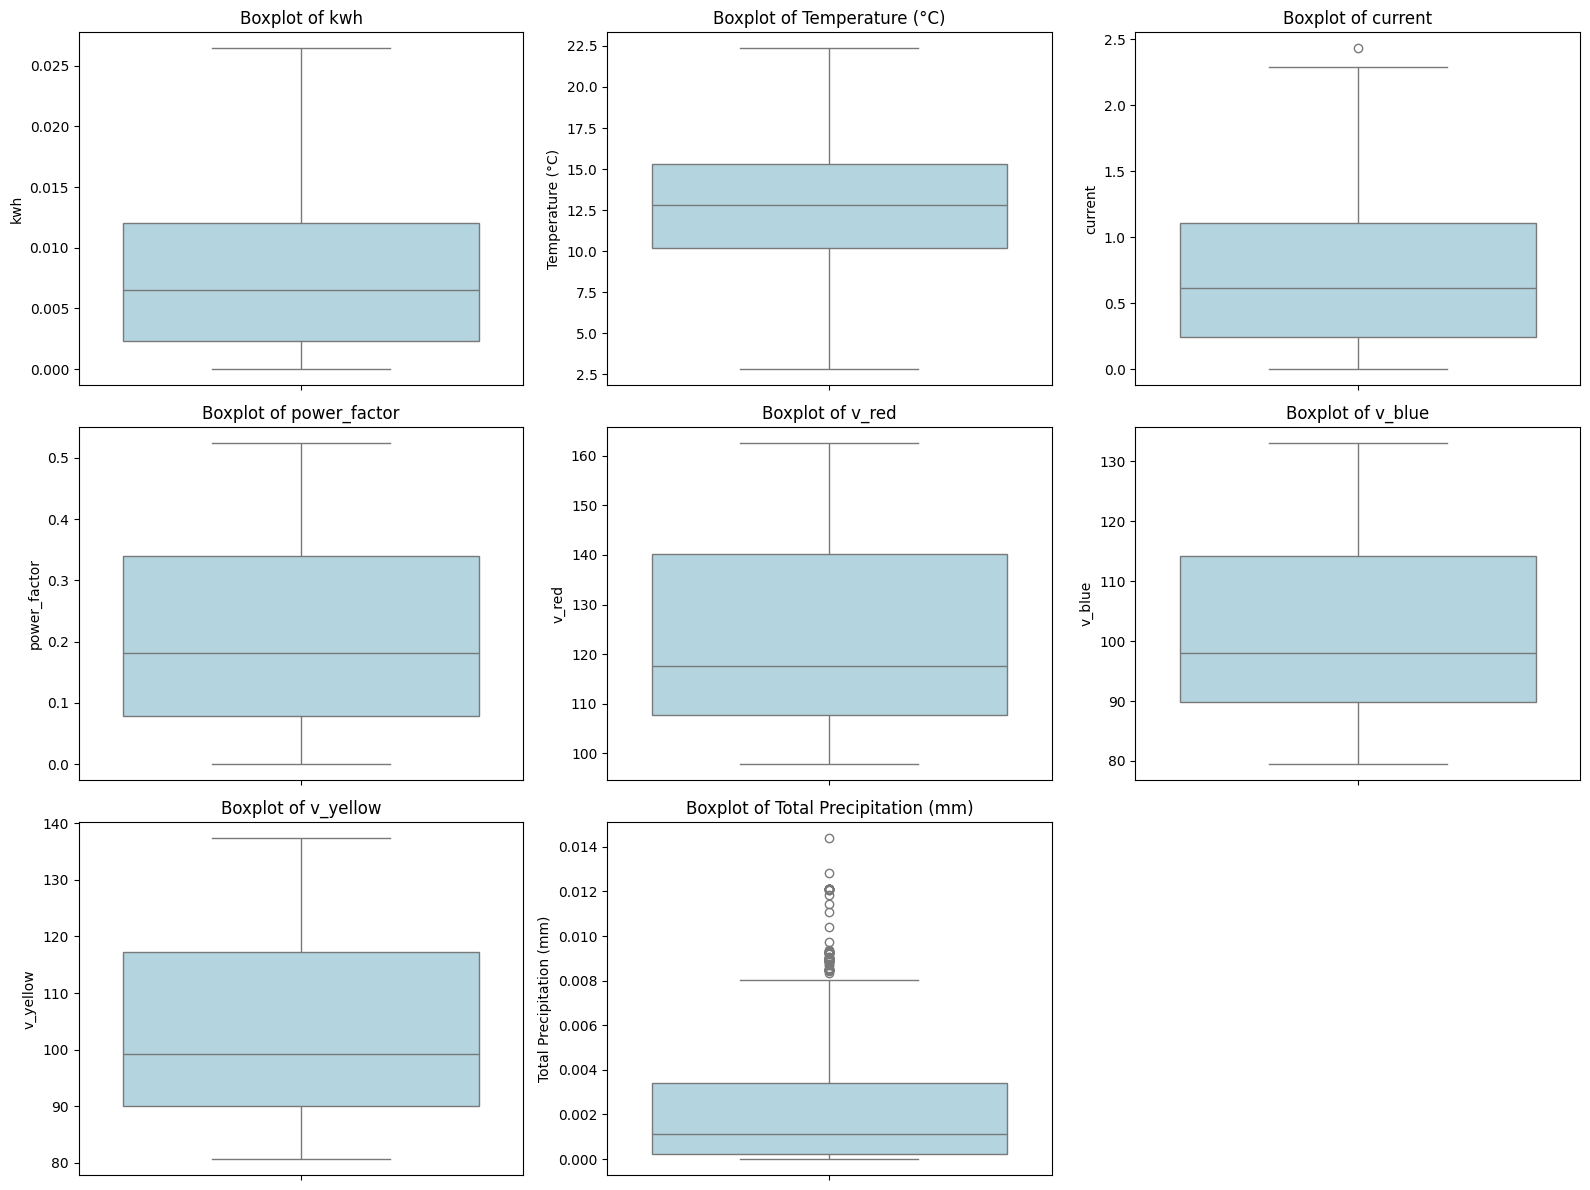

In [20]:
# List of numeric columns to check for outliers
cols_to_plot = ['kwh', 'Temperature (°C)', 'current', 'power_factor',
                'v_red', 'v_blue', 'v_yellow', 'Total Precipitation (mm)']

# Set up the figure
plt.figure(figsize=(16, 12))

# Plot each column's boxplot
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=col, color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')

    plt.ylabel(col)

plt.tight_layout()
plt.show()


**Checking for skewed features**

In [21]:
# Import
from scipy.stats import skew

# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute skewness
skewness = df[numeric_cols].skew().sort_values(ascending=False)

# View skewed features (typically skewness > 0.5 or < -0.5 is considered high)
print("Skewed features:")
print(skewness[abs(skewness) > 0.5])

Skewed features:
Snow Cover (%)              25.327813
Total Precipitation (mm)     1.544783
kwh                          0.618471
current                      0.512611
dtype: float64


In [22]:
# Transforming skewed features
# Apply log1p (log(1 + x)) to selected skewed columns
skewed_cols = skewness[abs(skewness) > 0.5].index

for col in skewed_cols:
    df[col + '_log'] = np.log1p(df[col])


In [23]:
# Check skewness after transformation
transformed_skew = df[[col + '_log' for col in skewed_cols]].skew()
print(transformed_skew)


Snow Cover (%)_log              25.319761
Total Precipitation (mm)_log     1.539098
kwh_log                          0.607396
current_log                      0.033839
dtype: float64


In [25]:
# Square root transformation
df['kwh_sqrt'] = np.sqrt(df['kwh'])

# Binning precipitation
df['precip_bin'] = pd.cut(df['Total Precipitation (mm)'],
                           bins=[-0.1, 0, 2, 10, np.inf],
                           labels=['None', 'Light', 'Moderate', 'Heavy'])

# Binary snow cover
df['snow_present'] = df['Snow Cover (%)'].apply(lambda x: 1 if x > 0 else 0)


In [26]:
# Check skewness after transformation
transformed_skew = df[[col + '_log' for col in skewed_cols]].skew()
print(transformed_skew)

Snow Cover (%)_log              25.319761
Total Precipitation (mm)_log     1.539098
kwh_log                          0.607396
current_log                      0.033839
dtype: float64


In [27]:
from sklearn.preprocessing import PowerTransformer


# Only use on numeric columns
pt = PowerTransformer(method='yeo-johnson')

# Select features to transform
features_to_transform = ['Snow Cover (%)', 'Total Precipitation (mm)', 'kwh', 'current']

# Apply and convert back to DataFrame
transformed = pt.fit_transform(df[features_to_transform])
df_yeo = pd.DataFrame(transformed, columns=[f"{col}_yeo" for col in features_to_transform])

# Join to original DataFrame if needed
df = pd.concat([df, df_yeo], axis=1)


In [28]:
df_yeo.skew()


,0
Snow Cover (%)_yeo,14.537264
Total Precipitation (mm)_yeo,0.479476
kwh_yeo,0.116339
current_yeo,0.006770


In [ ]:
df['snow_present'] = df['Snow Cover (%)'].apply(lambda x: 1 if x > 0 else 0)


In [ ]:
df['snow_bin'] = pd.cut(df['Snow Cover (%)'], bins=[-0.1, 0, 25, 50, 100], labels=['None', 'Low', 'Medium', 'High'])


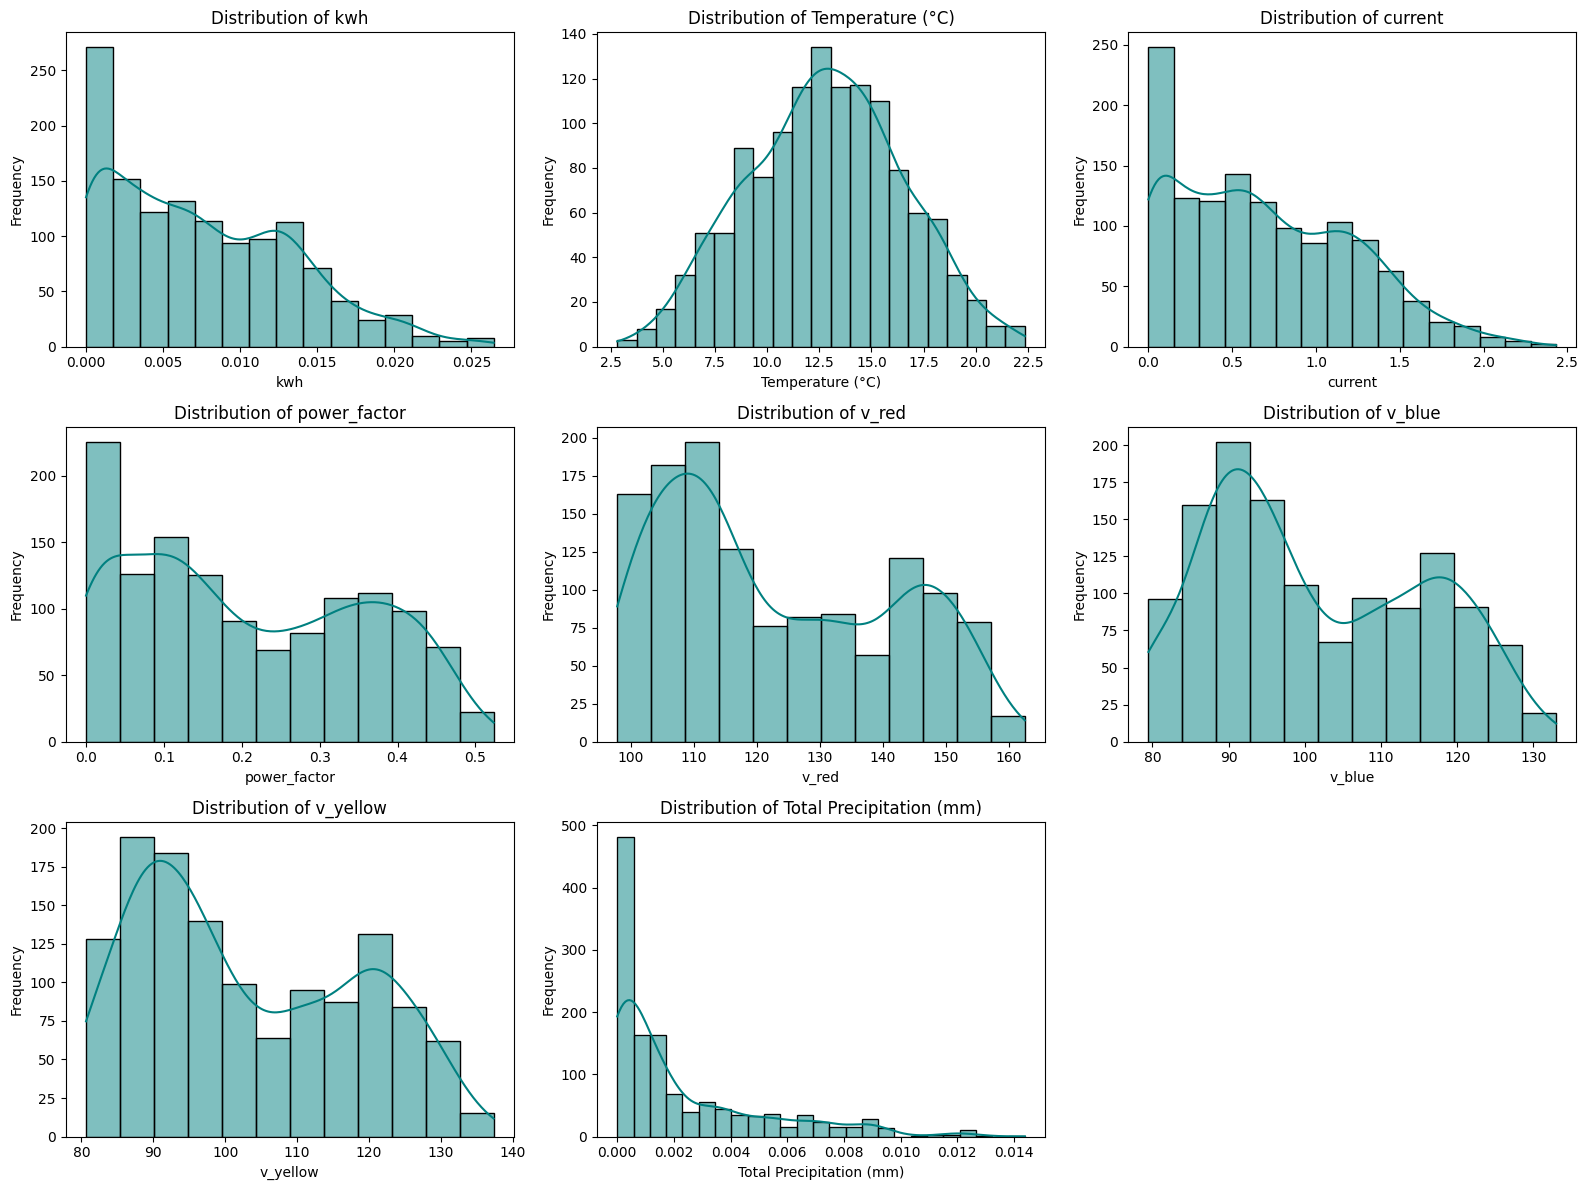

In [29]:
# Select key numerical columns for univariate analysis
cols_to_plot = ['kwh', 'Temperature (°C)', 'current', 'power_factor', 'v_red', 'v_blue', 'v_yellow', 'Total Precipitation (mm)']

# Set up the figure
plt.figure(figsize=(16, 12))

# Loop through and plot
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

,date_time,v_red,current,power_factor,kwh,v_blue,v_yellow,consumer_device_9,consumer_device_x,Temperature (°C),...,precip_bin,snow_present,Snow Cover (%)_yeo,Total Precipitation (mm)_yeo,kwh_yeo,current_yeo,Snow Cover (%)_yeo,Total Precipitation (mm)_yeo,kwh_yeo,current_yeo
0,2024-07-22 19:00:00,125.629543,1.256716,0.257529,0.009407,106.511045,107.392295,0.022277,21.527228,11.742883,...,Light,0,-0.068546,1.569765,0.480922,1.075041,-0.068546,1.569765,0.480922,1.075041
1,2024-07-22 20:00:00,131.438261,1.570021,0.293663,0.011940,108.350976,109.446880,0.022277,21.527228,11.413995,...,Light,0,-0.068546,1.574880,0.856852,1.482373,-0.068546,1.574880,0.856852,1.482373
2,2024-07-22 21:00:00,133.606395,1.623356,0.337952,0.013546,114.896351,116.076771,0.022277,21.527228,10.794870,...,Light,0,-0.068546,1.580766,1.070296,1.546434,-0.068546,1.580766,1.070296,1.546434
3,2024-07-22 22:00:00,130.571961,1.573983,0.295072,0.012767,112.902697,113.931385,0.022277,21.527228,10.399469,...,Light,0,-0.068546,1.584292,0.969006,1.487180,-0.068546,1.584292,0.969006,1.487180
4,2024-07-22 23:00:00,134.383937,1.929517,0.367702,0.015238,116.606275,118.257191,0.022277,21.527228,10.401529,...,Light,0,-0.068546,1.585813,1.276131,1.889316,-0.068546,1.585813,1.276131,1.889316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,2024-09-14 01:00:00,153.166360,1.311676,0.428511,0.013831,123.235015,127.066644,0.025281,20.637640,6.418542,...,Light,0,-0.068546,-1.068067,1.106253,1.150679,-0.068546,-1.068067,1.106253,1.150679
1279,2024-09-14 02:00:00,154.429679,1.390145,0.442519,0.014450,124.869917,128.664296,0.025281,20.637640,6.850275,...,Light,0,-0.068546,-0.967347,1.182515,1.255426,-0.068546,-0.967347,1.182515,1.255426
1280,2024-09-14 03:00:00,153.347107,1.335543,0.434412,0.013929,123.849137,127.600490,0.025281,20.637640,7.650003,...,Light,0,-0.068546,-0.456394,1.118423,1.182933,-0.068546,-0.456394,1.118423,1.182933
1281,2024-09-14 04:00:00,154.433743,1.359368,0.442128,0.014209,125.007733,128.811525,0.025281,20.637640,8.839426,...,Light,1,14.588839,-0.255853,1.153156,1.214783,14.588839,-0.255853,1.153156,1.214783
